In [64]:
from keras.models import load_model
import os
import sys
import pandas as pd
from PIL import Image
import numpy as np
sys.path.insert(1, '../src')

import preprocess_image

In [51]:
import importlib
importlib.reload(preprocess_image)

<module 'preprocess_image' from '../src/preprocess_image.py'>

## Load Images from Dataset

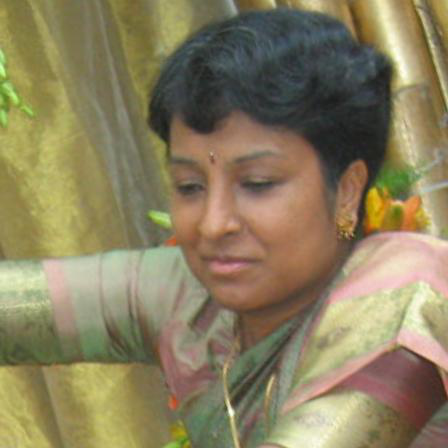

In [108]:
data_path = '../data/raw/'
image_dir = os.path.join(data_path, 'fairface_pad125')

train_csv = pd.read_csv(os.path.join(data_path, 'fairface_label_train.csv'))

img_path = os.path.join(image_dir, train_csv.iloc[1, 0])
image = Image.open(img_path)

image

In [109]:
# Preprocess Image

img = preprocess_image.detect_face(img_path)

## Predict

In [71]:
model = load_model("../models/gender_classifier.hdf5") 

In [115]:
pred = model.predict(img)[2][0]

if pred[0] > pred[1]:
    gender = "M"
else:
    gender = "F"

print("Prediction: {}\n\nF: {}\nM: {}".format(gender, pred[1], pred[0]))

Prediction: F

F: 0.7021043300628662
M: 0.2975195646286011
